In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from sktime.forecasting.tbats import TBATS
from load import load_data
from load import train_test_split
from load import get_measures


import warnings # retirar avisos
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 15, 5

In [2]:
df = load_data()
df["load_mwmed"].interpolate(method = "linear", inplace = True)

In [3]:
n_test = 31
train, test = train_test_split(df, n_test)

In [4]:
forecaster = TBATS(  
    use_box_cox=False,
    use_trend=False,
    use_damped_trend=False,
    sp=7,
    use_arma_errors=False)

In [5]:
forecaster.fit(train.load_mwmed.values) 

TBATS(sp=7, use_arma_errors=False, use_box_cox=False, use_damped_trend=False,
      use_trend=False)

In [7]:
y_pred = forecaster.predict(fh=[1])
y_pred

array([[10184.41001567]])

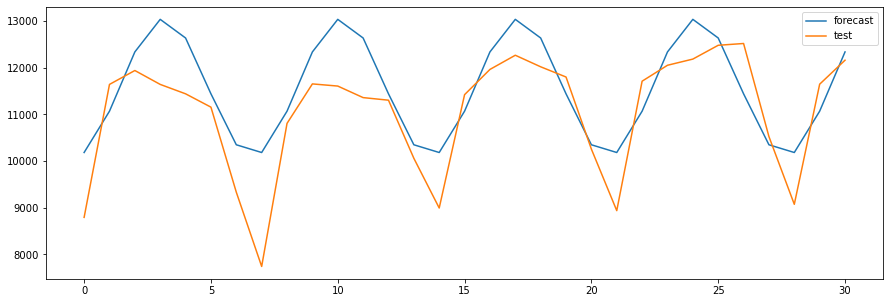

In [6]:
y_pred = forecaster.predict(fh=[x for x in range(1, 32)])
y_pred = [x for x in y_pred.flatten()]
plt.plot(y_pred, label = "forecast")
plt.plot(test.load_mwmed.reset_index(drop = True), label = "test")
plt.legend()
plt.show()